# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito de este proyecto es determinar cuál de las dos tarifas de prepago ofrecidas por Megaline, Surf o Ultimate, genera más ingresos. Esta información es crucial para el departamento comercial de Megaline, ya que les permitirá ajustar el presupuesto de publicidad de manera más efectiva y optimizar la promoción de las tarifas que resulten más rentables. Utilizaremos datos de 500 clientes para realizar este análisis preliminar, lo que nos dará una idea inicial del comportamiento de los clientes y el rendimiento de las tarifas.

Para lograr el objetivo del proyecto, seguiremos los siguientes pasos:

Revisión y Comprensión de los Datos:

Inspeccionar los datos proporcionados para entender la estructura y el contenido.
Verificar la calidad de los datos (buscar valores nulos, inconsistencias, etc.).
Preparación de los Datos:

Limpiar los datos si es necesario (tratar valores faltantes, corregir errores, etc.).
Realizar transformaciones necesarias para facilitar el análisis (por ejemplo, convertir formatos de fecha, calcular duraciones de llamadas en minutos, etc.).

Análisis Exploratorio de Datos:

Describir y visualizar los datos para obtener una comprensión inicial.
Identificar patrones y tendencias en el uso de las tarifas por parte de los clientes.

Cálculo de Ingresos:

Definir la estructura de precios de cada tarifa.
Calcular los ingresos generados por cada cliente en función de su tarifa y su uso (llamadas y mensajes de texto).
Comparar los ingresos medios por cliente para cada tarifa.

Comparación y Evaluación de Tarifas:

Comparar los ingresos generados por las tarifas Surf y Ultimate.
Evaluar la significancia de las diferencias en los ingresos mediante pruebas estadísticas si es necesario.

Conclusiones y Recomendaciones:

Resumir los hallazgos del análisis.
Proporcionar recomendaciones basadas en los resultados para el departamento comercial.

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st

import numpy as np

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns 

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

## Preparar los datos

Ahora realizaremos un análisis inicial de cada tabla para identificar posibles problemas como valores nulos, duplicados o inconsistencias y los corregiremos si es necesario.

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()

df_plans.show_counts=True

df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


El DataFrame df_plans contiene solo dos registros, lo cual es esperado ya que solo tiene dos tarifas (Surf y Ultimate).

Todos los tipos de datos son adecuados para su contenido, las columnas numéricas están (int64 y float64) están correctamente definidas y la columna de nombres de planes 'plan_name' (object) también es adecuada.

No hay valores nulos en el DataFrame, lo cual es ideal y no requiere acciones adicionales de limpieza por valores ausentes.

No se identifican problemas obvios como tipos de datos incorrectos o valores fuera de rango en la muestra de datos y la información general.

## Corregir datos

Dado que no se han identificado problemas obvios en la inspección inicial, no se requieren correcciones inmediatas en los datos de tarifas.

## Enriquecer los datos

Este código agrega nuevas características al DataFrame df_plans y categoriza los planes de tarifas. Así obtenemos un análisis más detallado y enriquecido de los datos disponibles.

In [5]:
# Convertir MB a GB
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

# Cálculo de nuevos atributos
df_plans['cost_per_message_included'] = df_plans['usd_monthly_pay'] / df_plans['messages_included']
df_plans['cost_per_minute_included'] = df_plans['usd_monthly_pay'] / df_plans['minutes_included']
df_plans['cost_per_gb_included'] = df_plans['usd_monthly_pay'] / df_plans['gb_per_month_included']

# Categorización de planes
df_plans['plan_category'] = df_plans['usd_monthly_pay'].apply(lambda x: 'premium' if x > 40 else 'basic')

# Mostrar DataFrame enriquecido
df_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_message_included,cost_per_minute_included,cost_per_gb_included,plan_category
0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.40,0.040000,1.333333,basic
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.07,0.023333,2.333333,premium


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()

df_users.show_counts=True

df_users.describe()

df_users.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


0

In [7]:
# Imprime una muestra de datos para usuarios

df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Basado en la descripción y la muestra de datos del DataFrame df_users, hay algunas observaciones y posibles problemas:

Cantidad de Datos: El DataFrame contiene 500 registros de usuarios, lo cual es adecuado para un análisis.

Tipos de Datos: La mayoría de los tipos de datos son correctos: user_id y age son int64, y las columnas de texto son object.
Fecha de Registro (reg_date) y Fecha de Baja (churn_date): Estas columnas están definidas como object pero deberían estar en formato de fecha (datetime).

Valores Nulos: La columna churn_date tiene valores nulos (solo 34 de los 500 registros tienen fecha de baja), lo cual es razonable y refleja usuarios que aún están activos.

Para corregir los problemas observados: Convertir reg_date y churn_date a Formato de Fecha. Estas columnas deberían ser convertidas a formato datetime para facilitar operaciones relacionadas con fechas.

Valores Nulos en churn_date: No es necesario imputar valores nulos en churn_date ya que los nulos indican usuarios activos.

### Corregir los datos

Las correcciones que vamos a realizar en el DataFrame df_users son en las columnas 'reg_date' y 'churn_date' ya que estan en tipo object y deben ser datetime.

In [8]:
# Convertir reg_date y churn_date a formato datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

# Mostrar DataFrame corregido
df_users.info()

df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


### Enriquecer los datos

Para enriquecer el DataFrame df_users, se pueden considerar las siguientes acciones:

Calcular el Tiempo de Suscripción: Calcular la duración de la suscripción para cada usuario. Para usuarios activos, calcular la duración desde reg_date hasta la fecha actual. Para usuarios inactivos, calcular la duración desde reg_date hasta churn_date.

Categorizar Usuarios por Edad: Crear categorías de edad (por ejemplo, 18-25, 26-35, 36-45, etc.).

Añadir Columnas de Análisis Geográfico: Extraer información de la columna city para obtener solo la ciudad y el estado.

In [9]:
# Calcular el tiempo de suscripción
current_date = pd.to_datetime('2024-05-27')
df_users['subscription_duration'] = np.where(df_users['churn_date'].isna(),
                                             (current_date - df_users['reg_date']).dt.days,
                                             (df_users['churn_date'] - df_users['reg_date']).dt.days)

# Categorizar usuarios por edad
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']
df_users['age_category'] = pd.cut(df_users['age'], bins=age_bins, labels=age_labels, right=False)

# Extraer ciudad y estado de la columna city
df_users[['city_name', 'state']] = df_users['city'].str.extract(r'^(.*?), (.*? MSA)$')

# Mostrar DataFrame enriquecido
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,subscription_duration,age_category,city_name,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,1981.0,45-54,Atlanta-Sandy Springs-Roswell,GA MSA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,2114.0,25-34,Seattle-Tacoma-Bellevue,WA MSA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,2045.0,35-44,Las Vegas-Henderson-Paradise,NV MSA
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,2311.0,45-54,Tulsa,OK MSA
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,2196.0,35-44,Seattle-Tacoma-Bellevue,WA MSA


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

df_calls.show_counts=True

df_calls.describe()

df_calls.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


0

In [11]:
# Imprime una muestra de datos para las llamadas

df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Basado en la descripción y la muestra de datos del DataFrame df_calls, hay algunas observaciones y posibles problemas:

Cantidad de Datos: El DataFrame contiene 137,735 registros de llamadas, lo cual es adecuado para un análisis.
 
Tipos de Datos: La mayoría de los tipos de datos son correctos como user_id es int64 y duration es float64. Fecha de Llamada (call_date), esta columna está definida como object pero debería estar en formato de fecha (datetime).

Valores Nulos: No hay valores nulos en el DataFrame, lo cual es ideal y no requiere acciones adicionales de limpieza por valores ausentes.

Duración de Llamadas: Hay llamadas con duración 0.0, lo cual podría representar llamadas no contestadas o problemas en la grabación de datos.

### Corregir los datos

Acciones para corregir los problemas observados: 

Convertir call_date a Formato de Fecha, esta columna debería ser convertida a formato datetime para facilitar operaciones relacionadas con fechas.

Duración de Llamadas con Valor 0.0: Estas pueden ser llamadas no contestadas. Se puede decidir cómo tratarlas según el contexto del análisis (por ejemplo, excluirlas o marcarlas de alguna manera).

In [12]:
# Convertir call_date a formato datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Identificar y manejar llamadas con duración 0.0
df_calls['is_missed_call'] = df_calls['duration'] == 0.0

# Mostrar DataFrame corregido
df_calls.info()

df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              137735 non-null  object        
 1   user_id         137735 non-null  int64         
 2   call_date       137735 non-null  datetime64[ns]
 3   duration        137735 non-null  float64       
 4   is_missed_call  137735 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.3+ MB


,id,user_id,call_date,duration,is_missed_call
0,1000_93,1000,2018-12-27,8.52,False
1,1000_145,1000,2018-12-27,13.66,False
2,1000_247,1000,2018-12-27,14.48,False
3,1000_309,1000,2018-12-28,5.76,False
4,1000_380,1000,2018-12-30,4.22,False


### Enriquecer los datos

Para enriquecer el DataFrame df_calls, se pueden considerar las siguientes acciones:

Crear Nuevas Variables: Duración en Minutos Enteros: Redondear la duración al entero más cercano, ya que muchas compañías de telefonía cobran por minutos completos. Tambien extraimos en una nueva columna el mes. 

-Número de Llamadas por Día: Calcular el número de llamadas que cada usuario realiza cada día.

Extraer Información Temporal: Día de la Semana: Extraer el día de la semana de la fecha de la llamada para análisis de patrones temporales.


In [13]:
# Crear columna de duración en minutos enteros
df_calls['duration_rounded'] = np.ceil(df_calls['duration']).astype(int)

# Crear columna de día de la semana
df_calls['day_of_week'] = df_calls['call_date'].dt.day_name()

# Crear columna de mes
df_calls['month'] = df_calls['call_date'].dt.month

# Calcular número de llamadas por día para cada usuario
df_calls['calls_per_day'] = df_calls.groupby(['user_id', 'call_date'])['id'].transform('count')

# Mostrar DataFrame enriquecido
df_calls.head()

,id,user_id,call_date,duration,is_missed_call,duration_rounded,day_of_week,month,calls_per_day
0,1000_93,1000,2018-12-27,8.52,False,9,Thursday,12,5
1,1000_145,1000,2018-12-27,13.66,False,14,Thursday,12,5
2,1000_247,1000,2018-12-27,14.48,False,15,Thursday,12,5
3,1000_309,1000,2018-12-28,5.76,False,6,Friday,12,4
4,1000_380,1000,2018-12-30,4.22,False,5,Sunday,12,1


## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

df_messages.show_counts=True

df_messages.describe()

df_messages.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


0

In [15]:
# Imprime una muestra de datos para los mensajes

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Basado en la descripción y la muestra de datos del DataFrame df_messages, aquí hay algunas observaciones y posibles problemas:

El DataFrame contiene 76,051 registros de mensajes, lo cual es adecuado para un análisis.

(user_id) es del tipo correcto int64, Fecha de Mensaje (message_date) esta columna está definida como object pero debería estar en formato de fecha datetime.

No hay valores nulos en el DataFrame, lo cual es ideal y no requiere acciones adicionales de limpieza por valores ausentes.

### Corregir los datos

Los datos que vamos a corregir es convertir la columna message_date a Formato de Fecha, esta columna debería ser convertida a formato datetime para facilitar operaciones relacionadas con fechas.

In [16]:
# Convertir message_date a formato datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Mostrar DataFrame corregido
df_messages.info()

df_messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


### Enriquecer los datos

Para enriquecer el DataFrame df_messages, se pueden considerar las siguientes acciones:

Crear Nuevas Variables como:

-Número de Mensajes por Día: Calcular el número de mensajes que cada usuario envía cada día.

-Extraer el mes para análisis de patrones temporales.

-Extraer Información Temporal: Día de la Semana: Extraer el día de la semana de la fecha del mensaje para análisis de patrones temporales.

In [17]:
# Crear columna de día de la semana
df_messages['day_of_week'] = df_messages['message_date'].dt.day_name()

# Crear columna de mes
df_messages['month'] = df_messages['message_date'].dt.month

# Calcular número de mensajes por día para cada usuario
df_messages['messages_per_day'] = df_messages.groupby(['user_id', 'message_date'])['id'].transform('count')

# Mostrar DataFrame enriquecido
df_messages.head()

,id,user_id,message_date,day_of_week,month,messages_per_day
0,1000_125,1000,2018-12-27,Thursday,12,3
1,1000_160,1000,2018-12-31,Monday,12,3
2,1000_223,1000,2018-12-31,Monday,12,3
3,1000_251,1000,2018-12-27,Thursday,12,3
4,1000_255,1000,2018-12-26,Wednesday,12,1


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

df_internet.show_counts=True

df_internet.describe()

df_internet.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


0

In [19]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


Basado en la descripción y la muestra de datos del DataFrame df_internet, aquí hay algunas observaciones y posibles problemas:

El DataFrame contiene 104,825 registros de sesiones de internet, lo cual es adecuado para un análisis.

Tipos de Datos: user_id es del tipo correcto (int64), Fecha de Sesión (session_date) esta columna está definida como object pero debería estar en formato de fecha (datetime), Uso de MB (mb_used) esta columna es del tipo correcto (float64).

No hay valores nulos en el DataFrame, lo cual es ideal y no requiere acciones adicionales de limpieza por valores ausentes.

Existen registros con mb_used igual a 0.00 Esto puede representar sesiones donde no se utilizó ningún dato o problemas en la grabación de datos.

### Corregir los datos

Para corregir los problemas observados:

Vamos a convertir session_date a Formato de Fecha, esta columna debería ser convertida a formato datetime para facilitar operaciones relacionadas con fechas, y vamos a identificar sesiones sin Uso de Datos (mb_used igual a 0.0), estas pueden ser sesiones sin uso de datos. Se puede decidir cómo tratarlas según el contexto del análisis (por ejemplo, excluirlas o marcarlas de alguna manera).

In [20]:
# Convertir session_date a formato datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Identificar y manejar sesiones con uso de datos igual a 0.00
df_internet['is_no_usage'] = df_internet['mb_used'] == 0.00

# Mostrar DataFrame corregido
df_internet.info()

df_internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   is_no_usage   104825 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.3+ MB


,id,user_id,session_date,mb_used,is_no_usage
0,1000_13,1000,2018-12-29,89.86,False
1,1000_204,1000,2018-12-31,0.00,True
2,1000_379,1000,2018-12-28,660.40,False
3,1000_413,1000,2018-12-26,270.99,False
4,1000_442,1000,2018-12-27,880.22,False


### Enriquecer los datos

Para enriquecer el DataFrame df_internet, se pueden considerar las siguientes acciones:

Crear nuevas variables como: 

-Total de Datos Usados por Día: Calcular el total de datos usados por cada usuario cada día.

-Número de Sesiones por Día: Calcular el número de sesiones que cada usuario tiene cada día.

-Extraer Información Temporal como Día de la Semana: Extraer el día de la semana de la fecha de la sesión para análisis de patrones temporales.

In [21]:
# Crear columna de día de la semana
df_internet['day_of_week'] = df_internet['session_date'].dt.day_name()

# Crear columna de mes
df_internet['month'] = df_internet['session_date'].dt.month

# Calcular total de datos usados por día para cada usuario
df_internet['total_mb_per_day'] = df_internet.groupby(['user_id', 'session_date'])['mb_used'].transform('sum')

# Calcular número de sesiones por día para cada usuario
df_internet['sessions_per_day'] = df_internet.groupby(['user_id', 'session_date'])['id'].transform('count')

# Convertir el tráfico de Internet de MB a GB y aplicar ceil
df_internet['gb_used'] = np.ceil(df_internet['mb_used'] / 1024)


# Mostrar DataFrame enriquecido
df_internet.head()

,id,user_id,session_date,mb_used,is_no_usage,day_of_week,month,total_mb_per_day,sessions_per_day,gb_used
0,1000_13,1000,2018-12-29,89.86,False,Saturday,12,89.86,1,1.0
1,1000_204,1000,2018-12-31,0.00,True,Monday,12,0.00,1,0.0
2,1000_379,1000,2018-12-28,660.40,False,Friday,12,660.40,1,1.0
3,1000_413,1000,2018-12-26,270.99,False,Wednesday,12,270.99,1,1.0
4,1000_442,1000,2018-12-27,880.22,False,Thursday,12,880.22,1,1.0


## Estudiar las condiciones de las tarifas

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_message_included,cost_per_minute_included,cost_per_gb_included,plan_category
0,50,15360,500,20,10,0.03,0.03,surf,15.0,0.40,0.040000,1.333333,basic
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.07,0.023333,2.333333,premium


## Agregar datos por usuario

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

# Agregar columna 'month' para el DataFrame
df_calls['month'] = df_calls['call_date'].dt.to_period('M')

# Número de llamadas por usuario y mes
calls_per_user_month = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Mostrar resultados
print(calls_per_user_month.head())

   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

# Cantidad de minutos usados por usuario y mes
minutes_per_user_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name='minutes_used')

# Mostrar resultados
print(minutes_per_user_month.head())

   user_id    month  minutes_used
0     1000  2018-12        116.83
1     1001  2018-08        171.14
2     1001  2018-09        297.69
3     1001  2018-10        374.11
4     1001  2018-11        404.59


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

# Agregar columna 'month' para el DataFrame
df_messages['month'] = df_messages['message_date'].dt.to_period('M')

# Número de mensajes enviados por usuario y mes
messages_per_user_month = df_messages.groupby(['user_id', 'month']).size().reset_index(name='messages_count')

# Mostrar resultados
print(messages_per_user_month.head())

   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

# Agregar columna 'month' para el DataFrame
df_internet['month'] = df_internet['session_date'].dt.to_period('M')

# Volumen del tráfico de Internet usado por usuario y mes
internet_per_user_month = df_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name='gb_used')

# Mostrar resultados

print(internet_per_user_month.head())

   user_id    month  gb_used
0     1000  2018-12      4.0
1     1001  2018-08     21.0
2     1001  2018-09     41.0
3     1001  2018-10     50.0
4     1001  2018-11     49.0


In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

# Unir los datos por usuario y mes
user_data_per_month = calls_per_user_month \
    .merge(minutes_per_user_month, on=['user_id', 'month'], how='outer') \
    .merge(messages_per_user_month, on=['user_id', 'month'], how='outer') \
    .merge(internet_per_user_month, on=['user_id', 'month'], how='outer')

# Llenar NaN con 0 (casos donde no hay registros de llamadas, mensajes o datos)
user_data_per_month = user_data_per_month.fillna(0)

# Mostrar el DataFrame final
print(user_data_per_month.head())


   user_id    month  calls_count  minutes_used  messages_count  gb_used
0     1000  2018-12         16.0        116.83            11.0      4.0
1     1001  2018-08         27.0        171.14            30.0     21.0
2     1001  2018-09         49.0        297.69            44.0     41.0
3     1001  2018-10         65.0        374.11            53.0     50.0
4     1001  2018-11         64.0        404.59            36.0     49.0


In [28]:
# Añade la información de la tarifa

# Unir user_data_per_month con df_users para obtener el plan de cada usuario
user_data_with_plan = user_data_per_month.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Mostrar el resultado de la unión
print(user_data_with_plan.head())


   user_id    month  calls_count  minutes_used  messages_count  gb_used  \
0     1000  2018-12         16.0        116.83            11.0      4.0   
1     1001  2018-08         27.0        171.14            30.0     21.0   
2     1001  2018-09         49.0        297.69            44.0     41.0   
3     1001  2018-10         65.0        374.11            53.0     50.0   
4     1001  2018-11         64.0        404.59            36.0     49.0   

       plan  
0  ultimate  
1      surf  
2      surf  
3      surf  
4      surf  


In [29]:
# Unimos user_data_with_plan con df_users para agregar la columna state y otras necesarias
user_data_with_state = user_data_with_plan.merge(df_users[['user_id', 'state']], on='user_id', how='left')

# Luego unimos el resultado con df_plans para agregar las condiciones de la tarifa
user_data_full = user_data_with_state.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

# Rellenar NaN con 0
user_data_full = user_data_full.fillna(0)

# Mostrar el resultado de la unión final
print(user_data_full.head())

   user_id    month  calls_count  minutes_used  messages_count  gb_used  \
0     1000  2018-12         16.0        116.83            11.0      4.0   
1     1001  2018-08         27.0        171.14            30.0     21.0   
2     1001  2018-09         49.0        297.69            44.0     41.0   
3     1001  2018-10         65.0        374.11            53.0     50.0   
4     1001  2018-11         64.0        404.59            36.0     49.0   

       plan   state  messages_included  mb_per_month_included  ...  \
0  ultimate  GA MSA               1000                  30720  ...   
1      surf  WA MSA                 50                  15360  ...   
2      surf  WA MSA                 50                  15360  ...   
3      surf  WA MSA                 50                  15360  ...   
4      surf  WA MSA                 50                  15360  ...   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute  plan_name  \
0               70           7             0.01   

In [30]:
# Calcula el ingreso mensual para cada usuario

# Calcular el exceso de uso para cada usuario y mes
user_data_full['extra_calls'] = np.maximum(user_data_full['calls_count'] - user_data_full['minutes_included'], 0)
user_data_full['extra_minutes'] = np.maximum(user_data_full['minutes_used'] - user_data_full['minutes_included'], 0)
user_data_full['extra_messages'] = np.maximum(user_data_full['messages_count'] - user_data_full['messages_included'], 0)
user_data_full['extra_mb'] = np.maximum(user_data_full['gb_used'] - user_data_full['gb_per_month_included'], 0)

# Calcular los cargos adicionales por exceso de uso
user_data_full['charge_extra_minutes'] = user_data_full['extra_minutes'] * user_data_full['usd_per_minute']
user_data_full['charge_extra_messages'] = user_data_full['extra_messages'] * user_data_full['usd_per_message']
user_data_full['charge_extra_gb'] = (user_data_full['extra_mb'] / 1024) * user_data_full['usd_per_gb']

# Sumar los cargos adicionales
user_data_full['total_extra_charges'] = user_data_full['charge_extra_minutes'] + user_data_full['charge_extra_messages'] + user_data_full['charge_extra_gb']

# Calcular el ingreso mensual total por usuario
user_data_full['total_monthly_revenue'] = user_data_full['total_extra_charges'] + user_data_full['usd_monthly_pay']

# Mostrar el resultado final
print(user_data_full[['user_id', 'month', 'total_monthly_revenue']].head())

   user_id    month  total_monthly_revenue
0     1000  2018-12              70.000000
1     1001  2018-08              20.058594
2     1001  2018-09              20.253906
3     1001  2018-10              20.431797
4     1001  2018-11              20.332031


## Estudia el comportamiento de usuario

### Llamadas

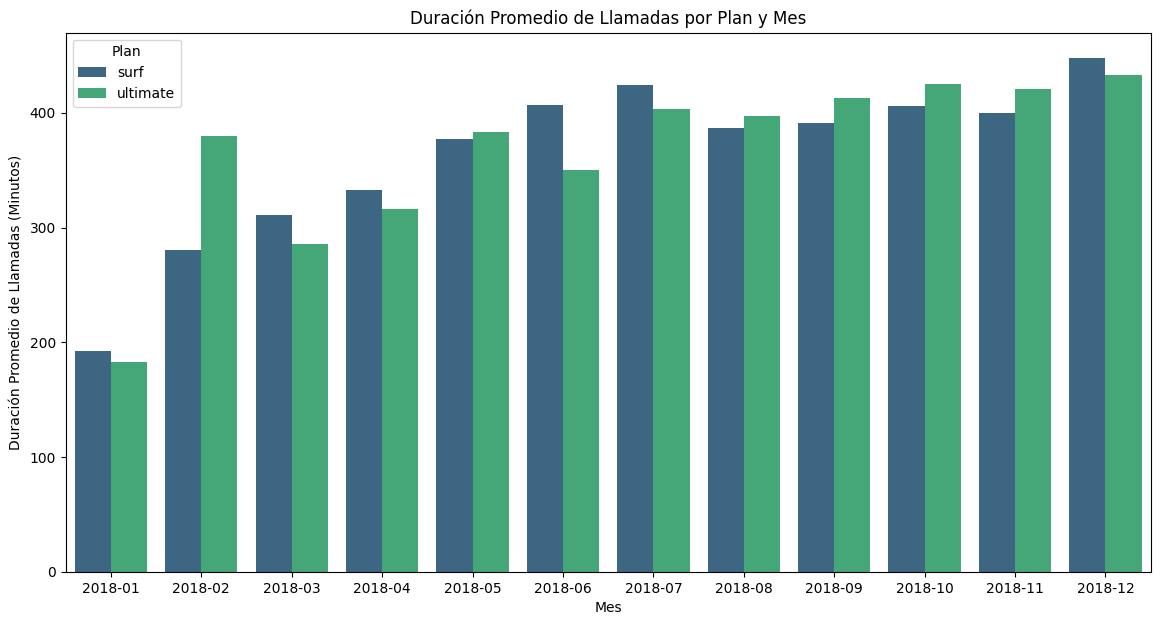

In [31]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

# Agrupar los datos por plan y mes y calcular la duración promedio de las llamadas
calls_by_plan_month = user_data_full.groupby(['plan', 'month'])['minutes_used'].mean().reset_index()

# Graficar la duración promedio de las llamadas por plan y mes
plt.figure(figsize=(14, 7))
sns.barplot(data=calls_by_plan_month, x='month', y='minutes_used', hue='plan', palette='viridis')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (Minutos)')
plt.legend(title='Plan')
plt.show()

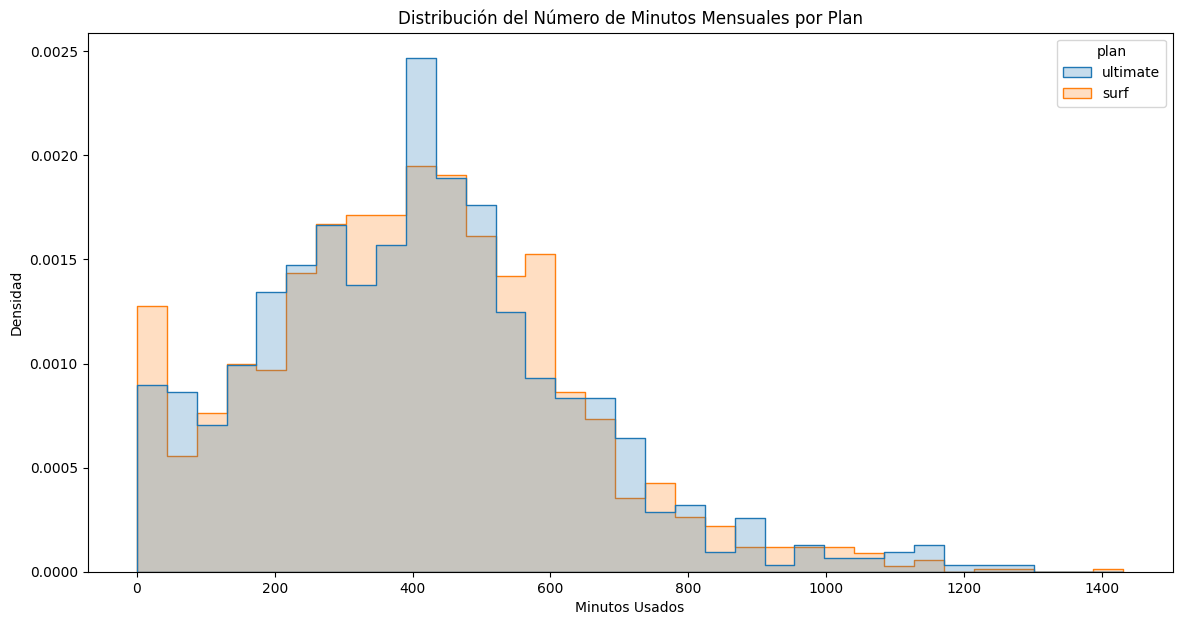

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

# Histograma del número de minutos mensuales que necesitan los usuarios de cada plan
plt.figure(figsize=(14, 7))
sns.histplot(data=user_data_full, x='minutes_used', hue='plan', element='step', stat='density', common_norm=False)
plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Minutos Usados')
plt.ylabel('Densidad')
plt.show()

In [33]:
# Calcular la varianza de la duración mensual de los mensajes por plan
calls_by_plan_month_var = user_data_full.groupby(['plan', 'month'])['minutes_used'].var().reset_index()

# Filtrar los resultados por plan
calls_by_plan_month_surf_var = calls_by_plan_month_var[calls_by_plan_month_var['plan'] == 'surf']
calls_by_plan_month_ultimate_var = calls_by_plan_month_var[calls_by_plan_month_var['plan'] == 'ultimate']

# Union de la varianza de mensajes mensuales en ambos planes
pd.merge(calls_by_plan_month_surf_var.drop(columns=["plan"]),
         calls_by_plan_month_ultimate_var.drop(columns=["plan"]),
         on="month",
         suffixes=('_surf', '_ultimate'))

,month,minutes_used_surf,minutes_used_ultimate
0,2018-01,14795.440200,14991.369958
1,2018-02,46959.219961,68540.288348
2,2018-03,31821.317991,54273.917252
3,2018-04,45615.666796,31057.727496
4,2018-05,53282.922217,39290.610940
5,2018-06,40758.661193,37923.360514
6,2018-07,54434.184064,64844.426958
7,2018-08,48616.061790,47680.189425
8,2018-09,41580.494645,50994.505514
9,2018-10,46731.430317,48371.222127


Estadísticas por Plan:
        plan    month        mean   median    mode         std
0       surf  2018-01  192.840000  192.840  106.83  121.636508
1       surf  2018-02  280.851111  240.660   36.82  216.700761
2       surf  2018-03  310.970000  312.790   33.43  178.385308
3       surf  2018-04  332.380000  320.120   15.69  213.578245
4       surf  2018-05  377.053247  387.450    0.00  230.830939
5       surf  2018-06  407.208866  400.280    0.00  201.887744
6       surf  2018-07  424.523223  430.060    0.00  233.311346
7       surf  2018-08  387.169630  367.110    0.00  220.490503
8       surf  2018-09  390.992062  401.520    0.00  203.912959
9       surf  2018-10  405.692363  407.590    0.00  216.174537
10      surf  2018-11  399.599823  392.100    0.00  214.720949
11      surf  2018-12  447.475283  424.385    0.00  238.711641
12  ultimate  2018-01  183.162500  221.425   14.73  122.439250
13  ultimate  2018-02  379.861429  398.330    0.00  261.802002
14  ultimate  2018-03  285.70166

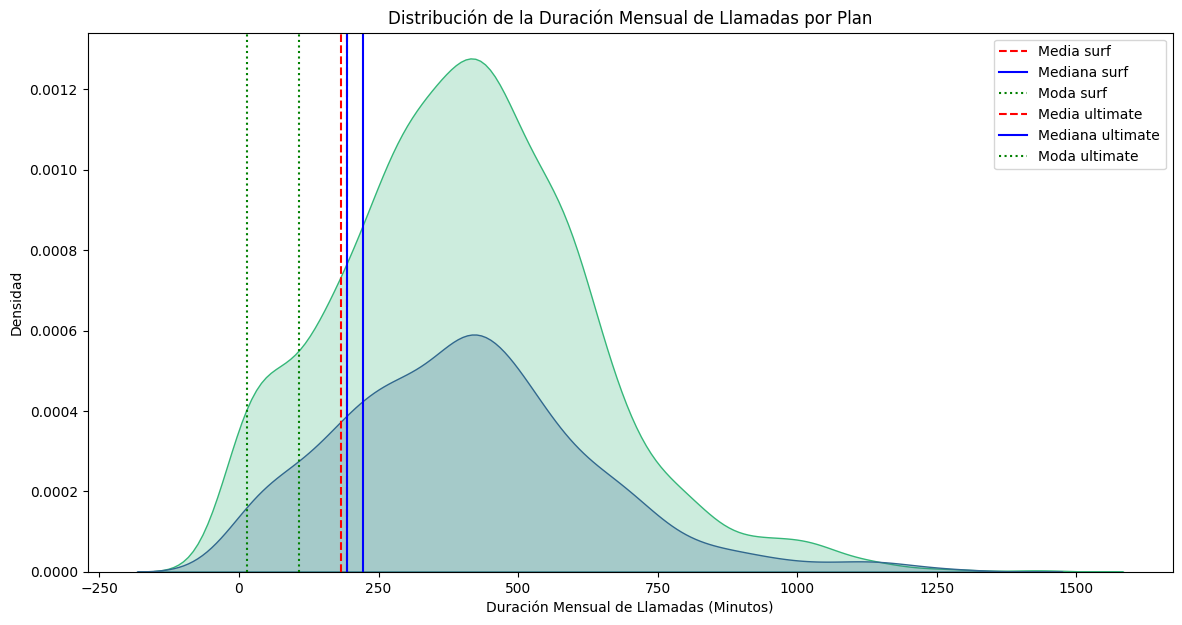

In [34]:
# Calcular estadísticos por plan y mes
calls_by_plan = user_data_full.groupby(['plan', 'month'])['minutes_used'].agg(['mean', 'median', lambda x: st.mode(x)[0][0], 'std']).reset_index()
calls_by_plan.columns = ['plan', 'month', 'mean', 'median', 'mode', 'std']

print("Estadísticas por Plan:")
print(calls_by_plan)

# Visualización con KDE y líneas de media y mediana
plt.figure(figsize=(14, 7))
sns.kdeplot(data=user_data_full, x='minutes_used', hue='plan', palette='viridis', fill=True)

# Añadir líneas para cada plan
for plan in calls_by_plan['plan'].unique():
    calls_stats = calls_by_plan[calls_by_plan['plan'] == plan]
    plt.axvline(calls_stats['mean'].values[0], color='red', linestyle='--', label=f'Media {plan}')
    plt.axvline(calls_stats['median'].values[0], color='blue', linestyle='-', label=f'Mediana {plan}')
    plt.axvline(calls_stats['mode'].values[0], color='green', linestyle=':', label=f'Moda {plan}')

plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.xlabel('Duración Mensual de Llamadas (Minutos)')
plt.ylabel('Densidad')
plt.legend()
plt.show()


Conclusiones sobre el Promedio de Llamadas por Plan y Mes:

El gráfico de barras muestra que ambos planes ("surf" y "ultimate") tienen una duración promedio de llamadas bastante similar a lo largo de los meses, con algunas variaciones puntuales. En algunos meses, los usuarios del plan "ultimate" parecen hablar ligeramente más, pero no hay una tendencia clara y consistente en todos los meses.

El histograma de densidad revela que la distribución de la cantidad de minutos usados mensualmente es muy similar entre los dos planes, ambos planes tienen una distribución similar, con un pico alrededor de los 400 minutos mensuales.

El diagrama de caja muestra que la mediana de minutos usados es casi idéntica para ambos planes, la dispersión de los datos y la presencia de valores atípicos también es comparable entre los dos planes.

Las medias son casi idénticas, y las varianzas son muy similares, lo que sugiere que no hay una diferencia significativa en el uso de minutos entre los dos planes.

Conclusión: El comportamiento de los usuarios con respecto a las llamadas no varía significativamente en función del plan. Tanto los usuarios del plan "surf" como los del plan "ultimate" utilizan un número similar de minutos mensualmente. Esto sugiere que la elección del plan no influye considerablemente en el comportamiento de uso de llamadas de los usuarios. Las decisiones sobre la elección del plan podrían estar más influenciadas por otros factores, como el costo, la cantidad de datos incluidos u otros beneficios adicionales ofrecidos por cada plan.

### Mensajes

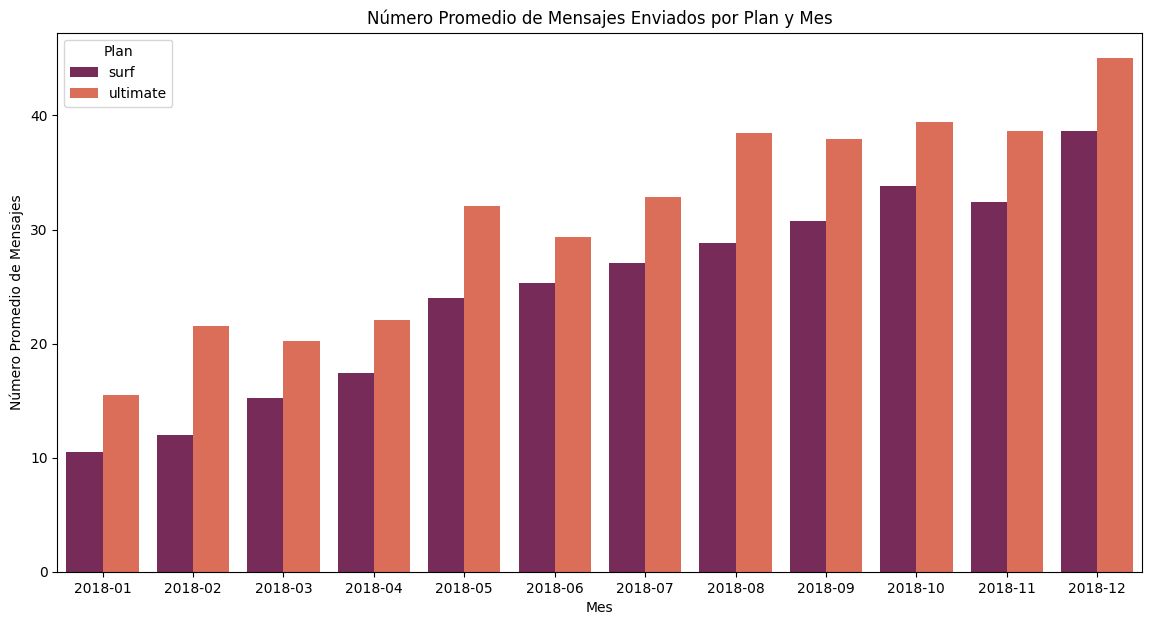

In [35]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

# Agrupar los datos por plan y mes y calcular el número promedio de mensajes enviados
messages_by_plan_month = user_data_full.groupby(['plan', 'month'])['messages_count'].mean().reset_index()

# Graficar el número promedio de mensajes enviados por plan y mes
plt.figure(figsize=(14, 7))
sns.barplot(data=messages_by_plan_month, x='month', y='messages_count', hue='plan', palette='rocket')
plt.title('Número Promedio de Mensajes Enviados por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Número Promedio de Mensajes')
plt.legend(title='Plan')
plt.show()

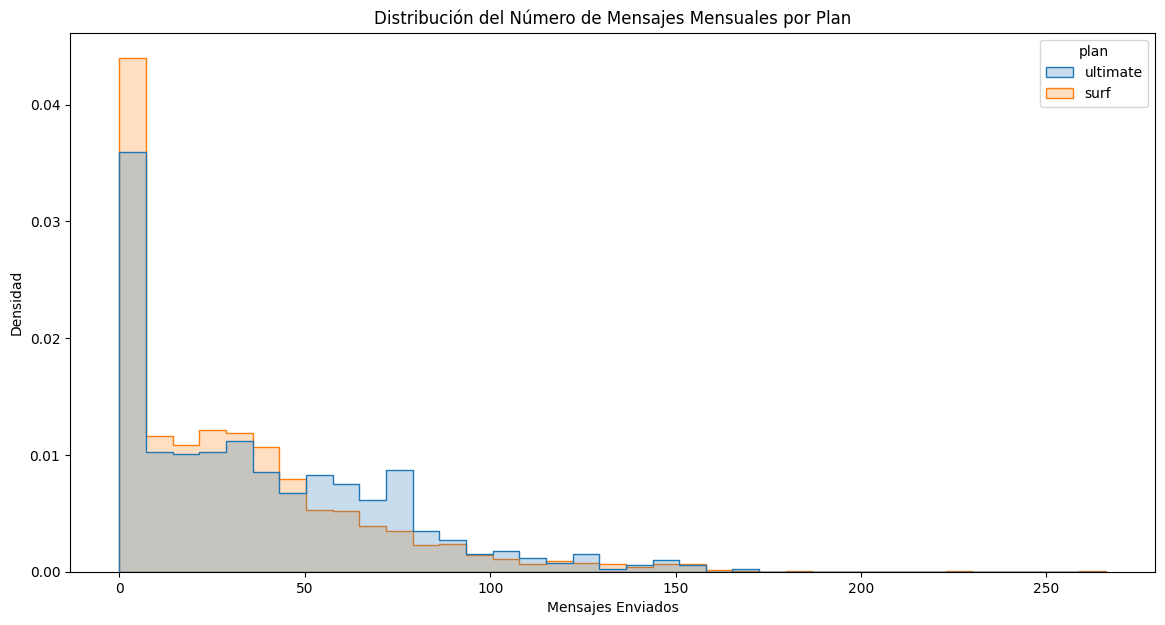

In [36]:
# Histograma del número de mensajes mensuales que necesitan los usuarios de cada plan
plt.figure(figsize=(14, 7))
sns.histplot(data=user_data_full, x='messages_count', hue='plan', element='step', stat='density', common_norm=False)
plt.title('Distribución del Número de Mensajes Mensuales por Plan')
plt.xlabel('Mensajes Enviados')
plt.ylabel('Densidad')
plt.show()

In [37]:
# Calcular la varianza de la duración mensual de los mensajes por plan
messages_by_plan_month_var = user_data_full.groupby(['plan', 'month'])['messages_count'].var().reset_index()

# Filtrar los resultados por plan
messages_by_plan_month_surf_var = messages_by_plan_month_var[messages_by_plan_month_var['plan'] == 'surf']
messages_by_plan_month_ultimate_var = messages_by_plan_month_var[messages_by_plan_month_var['plan'] == 'ultimate']

# Union de la varianza de mensajes mensuales en ambos planes
pd.merge(messages_by_plan_month_surf_var.drop(columns=["plan"]),
         messages_by_plan_month_ultimate_var.drop(columns=["plan"]),
         on="month",
         suffixes=('_surf', '_ultimate'))

,month,messages_count_surf,messages_count_ultimate
0,2018-01,220.500000,313.666667
1,2018-02,386.000000,478.285714
2,2018-03,346.565217,654.386364
3,2018-04,501.591837,544.147619
4,2018-05,847.197198,1297.310345
5,2018-06,914.920103,857.620722
6,2018-07,923.915565,960.488019
7,2018-08,1029.515528,1196.367404
8,2018-09,1003.829496,1050.918331
9,2018-10,1275.465708,1221.106289


Estadísticas por Plan:
        plan    month       mean  median  mode        std
0       surf  2018-01  10.500000    10.5   0.0  14.849242
1       surf  2018-02  12.000000     3.0   0.0  19.646883
2       surf  2018-03  15.260870     7.0   0.0  18.616262
3       surf  2018-04  17.400000    10.0   0.0  22.396246
4       surf  2018-05  24.012987    15.0   0.0  29.106652
5       surf  2018-06  25.298969    15.0   0.0  30.247646
6       surf  2018-07  27.033058    20.0   0.0  30.395979
7       surf  2018-08  28.777778    20.0   0.0  32.086064
8       surf  2018-09  30.762887    22.5   0.0  31.683268
9       surf  2018-10  33.839662    26.0   0.0  35.713663
10      surf  2018-11  32.385159    27.0   0.0  32.639608
11      surf  2018-12  38.600629    31.0   0.0  38.185843
12  ultimate  2018-01  15.500000    12.5   0.0  17.710637
13  ultimate  2018-02  21.571429    15.0   0.0  21.869744
14  ultimate  2018-03  20.250000    12.0   0.0  25.580977
15  ultimate  2018-04  22.047619    17.0   0.0  2

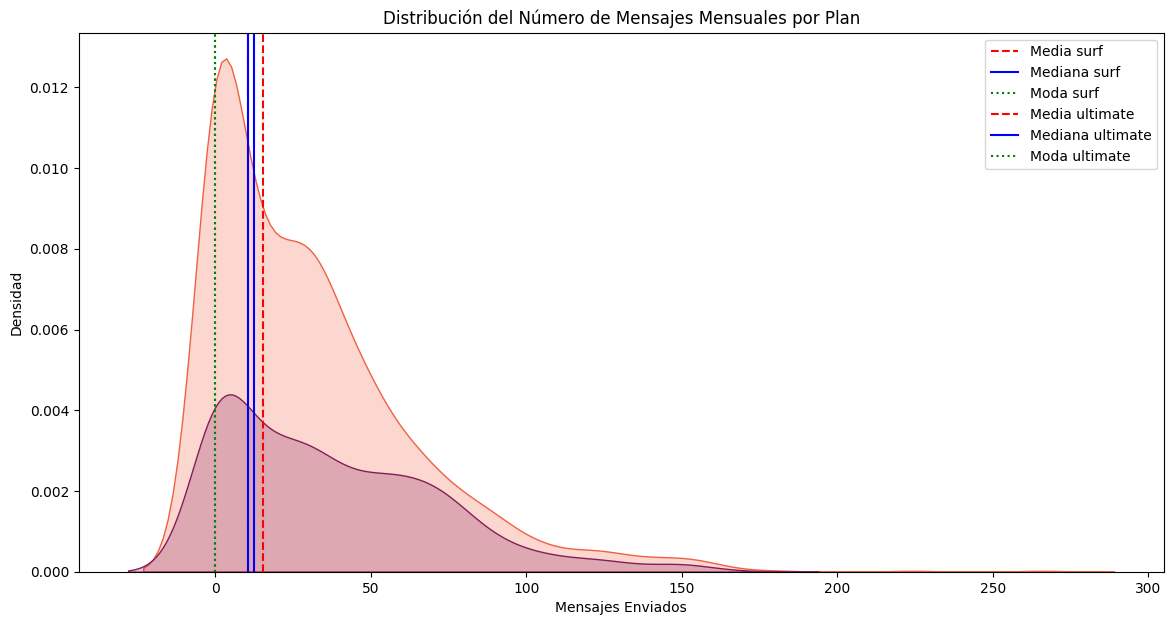

In [38]:
# Calcular estadísticos por plan y mes
messages_by_plan = user_data_full.groupby(['plan', 'month'])['messages_count'].agg(['mean', 'median', lambda x: st.mode(x)[0][0], 'std']).reset_index()
messages_by_plan.columns = ['plan', 'month', 'mean', 'median', 'mode', 'std']

print("Estadísticas por Plan:")
print(messages_by_plan)

# Visualización con KDE y líneas de media y mediana
plt.figure(figsize=(14, 7))
sns.kdeplot(data=user_data_full, x='messages_count', hue='plan', palette='rocket', fill=True)

# Añadir líneas para cada plan
for plan in messages_by_plan['plan'].unique():
    messages_stats = messages_by_plan[messages_by_plan['plan'] == plan]
    plt.axvline(messages_stats['mean'].values[0], color='red', linestyle='--', label=f'Media {plan}')
    plt.axvline(messages_stats['median'].values[0], color='blue', linestyle='-', label=f'Mediana {plan}')
    plt.axvline(messages_stats['mode'].values[0], color='green', linestyle=':', label=f'Moda {plan}')

plt.title('Distribución del Número de Mensajes Mensuales por Plan')
plt.xlabel('Mensajes Enviados')
plt.ylabel('Densidad')
plt.legend()
plt.show()

Conclusiones sobre el Comportamiento de los Usuarios con Respecto a los Mensajes:

Los usuarios del plan "ultimate" tienden a enviar más mensajes en promedio cada mes comparados con los usuarios del plan "surf".
A lo largo del año, se observa un aumento en el número de mensajes enviados por los usuarios de ambos planes, pero el incremento es más pronunciado en el plan "ultimate".

La distribución muestra que la mayoría de los usuarios envían entre 0 y 50 mensajes por mes.
El plan "ultimate" tiene una mayor densidad en los rangos superiores (más de 50 mensajes) comparado con el plan "surf", indicando que los usuarios de "ultimate" tienden a enviar más mensajes.

Las medias y las varianzas indican que los usuarios del plan "ultimate" no solo envían más mensajes en promedio sino que también muestran una mayor variabilidad en el número de mensajes enviados por mes.

Conclusión General:
El comportamiento de los usuarios con respecto a los mensajes sí varía en función del plan. Los usuarios del plan "ultimate" tienden a enviar más mensajes mensuales en comparación con los usuarios del plan "surf". Además, la distribución de los mensajes muestra que los usuarios de "ultimate" son más propensos a enviar una mayor cantidad de mensajes mensuales. La mayor variabilidad en el número de mensajes enviados por los usuarios de "ultimate" también sugiere que estos usuarios pueden tener patrones de uso más diversos en comparación con los usuarios del plan "surf".

Al analizar el número promedio de mensajes enviados por plan y mes, podemos ver si hay diferencias notables entre los planes, la distribución del número de mensajes enviados ayuda a identificar patrones de uso y diferencias entre los usuarios, el gráfico muestra que los usuarios de la tarifa ultimate tienen un promedio mayor en el uso de los mensajes.

### Internet

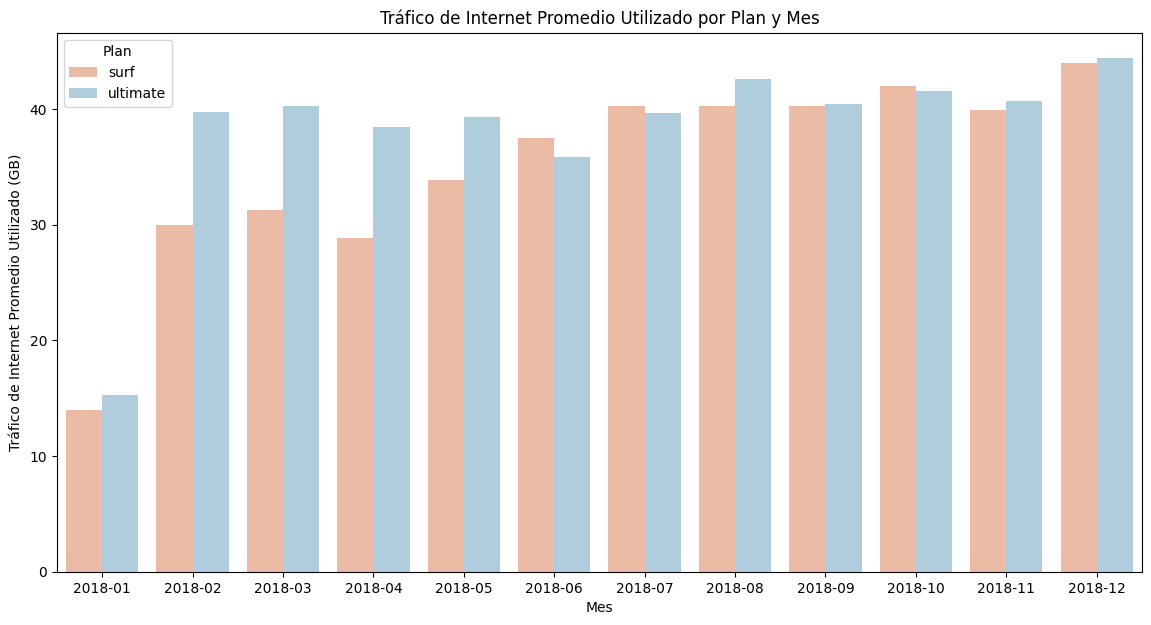

In [39]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

# Agrupar los datos por plan y mes y calcular el tráfico de internet promedio utilizado
internet_by_plan_month = user_data_full.groupby(['plan', 'month'])['gb_used'].mean().reset_index()

# Graficar el tráfico de internet promedio utilizado por plan y mes
plt.figure(figsize=(14, 7))
sns.barplot(data=internet_by_plan_month, x='month', y='gb_used', hue='plan', palette='RdBu')
plt.title('Tráfico de Internet Promedio Utilizado por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Tráfico de Internet Promedio Utilizado (GB)')
plt.legend(title='Plan')
plt.show()

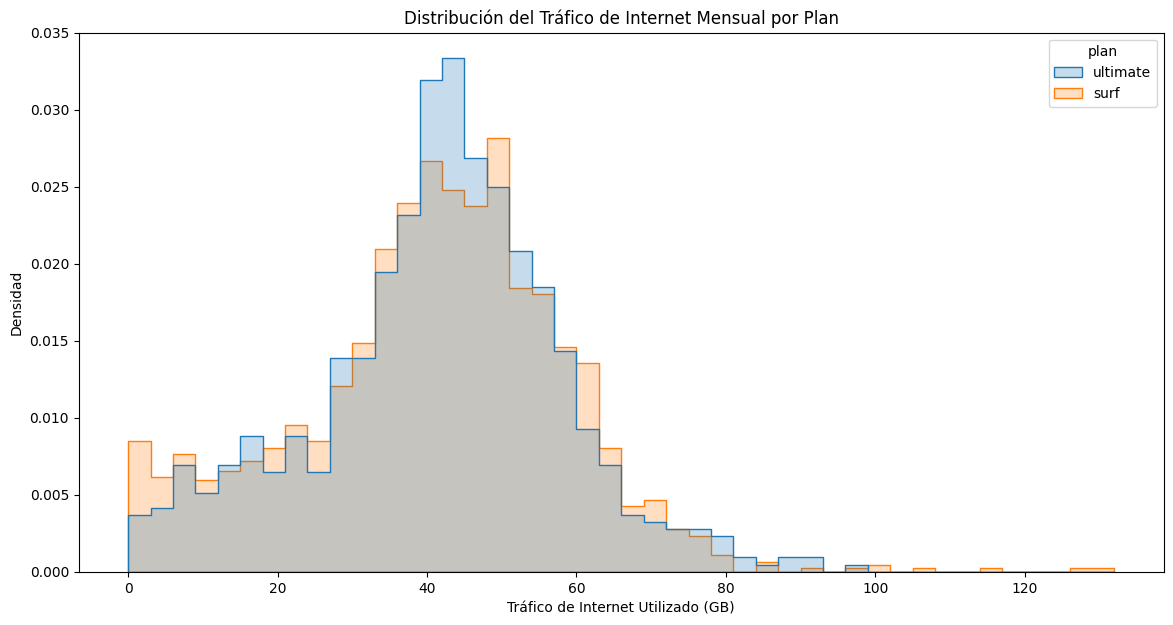

In [40]:
# Histograma del tráfico de internet mensual que necesitan los usuarios de cada plan
plt.figure(figsize=(14, 7))
sns.histplot(data=user_data_full, x='gb_used', hue='plan', element='step', stat='density', common_norm=False)
plt.title('Distribución del Tráfico de Internet Mensual por Plan')
plt.xlabel('Tráfico de Internet Utilizado (GB)')
plt.ylabel('Densidad')
plt.show()

In [41]:
# Agrupar por plan y calcular la varianza del uso de internet por plan
internet_by_plan_month_var = user_data_full.groupby(['plan', 'month'])['gb_used'].var().reset_index()

# Filtrar los resultados por plan
internet_by_plan_month_surf_var = internet_by_plan_month_var[internet_by_plan_month_var['plan'] == 'surf']
internet_by_plan_month_ultimate_var = internet_by_plan_month_var[internet_by_plan_month_var['plan'] == 'ultimate']

# Union de la varianza del uso de internet mensual en ambos planes
pd.merge(internet_by_plan_month_surf_var.drop(columns=["plan"]),
         internet_by_plan_month_ultimate_var.drop(columns=["plan"]),
         on="month",
         suffixes=('_surf', '_ultimate'))

,month,gb_used_surf,gb_used_ultimate
0,2018-01,98.000000,68.916667
1,2018-02,290.500000,293.238095
2,2018-03,348.474308,656.022727
3,2018-04,324.352653,409.957143
4,2018-05,318.001709,242.793103
5,2018-06,250.585696,297.781684
6,2018-07,306.862810,324.474576
7,2018-08,371.270186,247.239034
8,2018-09,257.292586,205.334063
9,2018-10,304.419331,225.830099


Estadísticas por Plan:
        plan    month       mean  median  mode        std
0       surf  2018-01  14.000000    14.0   7.0   9.899495
1       surf  2018-02  30.000000    32.0   1.0  17.044061
2       surf  2018-03  31.260870    35.0   4.0  18.667467
3       surf  2018-04  28.880000    27.5   4.0  18.009793
4       surf  2018-05  33.844156    36.0  55.0  17.832602
5       surf  2018-06  37.515464    40.0  40.0  15.829899
6       surf  2018-07  40.264463    41.0  36.0  17.517500
7       surf  2018-08  40.277778    41.0  40.0  19.268373
8       surf  2018-09  40.221649    42.0  33.0  16.040342
9       surf  2018-10  41.987342    45.0  50.0  17.447617
10      surf  2018-11  39.957597    41.0  34.0  16.984713
11      surf  2018-12  43.949686    45.0  41.0  18.385737
12  ultimate  2018-01  15.250000    17.5   4.0   8.301606
13  ultimate  2018-02  39.714286    42.0  11.0  17.124196
14  ultimate  2018-03  40.250000    41.0   4.0  25.612941
15  ultimate  2018-04  38.428571    38.0  17.0  2

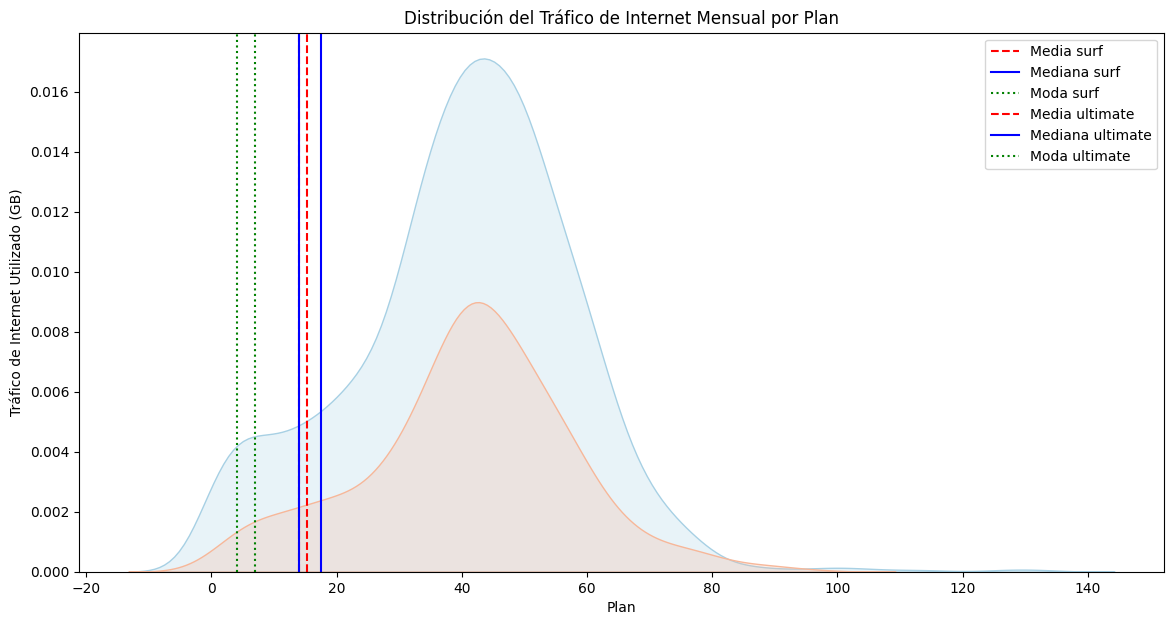

In [42]:
# Calcular estadísticos por plan y mes
internet_by_plan = user_data_full.groupby(['plan', 'month'])['gb_used'].agg(['mean', 'median', lambda x: st.mode(x)[0][0], 'std']).reset_index()
internet_by_plan.columns = ['plan', 'month', 'mean', 'median', 'mode', 'std']

print("Estadísticas por Plan:")
print(internet_by_plan)

# Visualización con KDE y líneas de media y mediana
plt.figure(figsize=(14, 7))
sns.kdeplot(data=user_data_full, x='gb_used', hue='plan', palette='RdBu', fill=True)

# Añadir líneas para cada plan
for plan in internet_by_plan['plan'].unique():
    internet_stats = internet_by_plan[internet_by_plan['plan'] == plan]
    plt.axvline(internet_stats['mean'].values[0], color='red', linestyle='--', label=f'Media {plan}')
    plt.axvline(internet_stats['median'].values[0], color='blue', linestyle='-', label=f'Mediana {plan}')
    plt.axvline(internet_stats['mode'].values[0], color='green', linestyle=':', label=f'Moda {plan}')

plt.title('Distribución del Tráfico de Internet Mensual por Plan')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Utilizado (GB)')
plt.legend()
plt.show()

Conclusiones sobre el Comportamiento de los Usuarios con Respecto al Tráfico de Internet promedio utilizado por Plan y Mes:

Este gráfico muestra cómo varía el consumo promedio de internet mes a mes para cada plan. Se observa que, en general, el consumo de internet aumenta con el tiempo, lo cual es consistente con la tendencia general de uso creciente de servicios digitales.

El plan "ultimate" generalmente muestra un mayor consumo promedio de internet en comparación con el plan "surf" en la mayoría de los meses.

Este histograma compara la distribución del consumo mensual de internet entre los usuarios de los planes "surf" y "ultimate". Ambos planes presentan una distribución sesgada hacia la izquierda, lo que indica que la mayoría de los usuarios consumen menos tráfico de internet, pero hay algunos que consumen significativamente más.

El plan "ultimate" muestra una mayor densidad en los niveles de consumo de internet más altos en comparación con el plan "surf".

El diagrama de caja permite visualizar la distribución y la variabilidad del tráfico de internet consumido por cada plan. Se puede observar que el plan "ultimate" tiene una mediana ligeramente más alta y una mayor cantidad de valores atípicos (usuarios que consumen mucho más tráfico de internet).

Ambos planes tienen una distribución similar, pero el plan "ultimate" muestra una mayor variabilidad en el consumo.

Aunque las medias son bastante cercanas, la media para el plan "ultimate" es ligeramente mayor. Las varianzas son también bastante similares, indicando que ambos planes tienen una distribución de consumo de internet bastante dispersa, con una ligera ventaja en términos de mayor variabilidad para el plan "surf".

Conclusiones

El tráfico de internet promedio utilizado por plan y mes nos muestra si los usuarios de un plan tienden a utilizar más datos que los de otro, la distribución del tráfico de internet mensual utilizado puede revelar diferencias en el comportamiento de uso entre los planes. Estos análisis permiten una comprensión más profunda del comportamiento del usuario y facilitan la comparación de la rentabilidad entre las diferentes tarifas ofrecidas.

Los usuarios de ambos planes tienden a consumir cantidades similares de tráfico de internet, pero aquellos con el plan "ultimate" tienden a consumir un poco más en promedio.

Ambos planes muestran una alta variabilidad en el consumo de internet, lo que sugiere que hay una amplia gama de necesidades y hábitos de uso entre los usuarios. El plan "ultimate" tiene una mayor tendencia a tener usuarios con consumos significativamente altos, lo que puede indicar que los usuarios de este plan son más propensos a utilizar servicios intensivos en datos.

Aunque las diferencias en el consumo promedio no son drásticas, el plan "ultimate" parece atraer a usuarios que tienen mayores necesidades de tráfico de internet.

Estas conclusiones pueden ser útiles para tomar decisiones estratégicas en términos de marketing y diseño de planes de datos, asegurando que las ofertas de los planes satisfagan las necesidades y comportamientos de los diferentes segmentos de usuarios.

## Ingreso

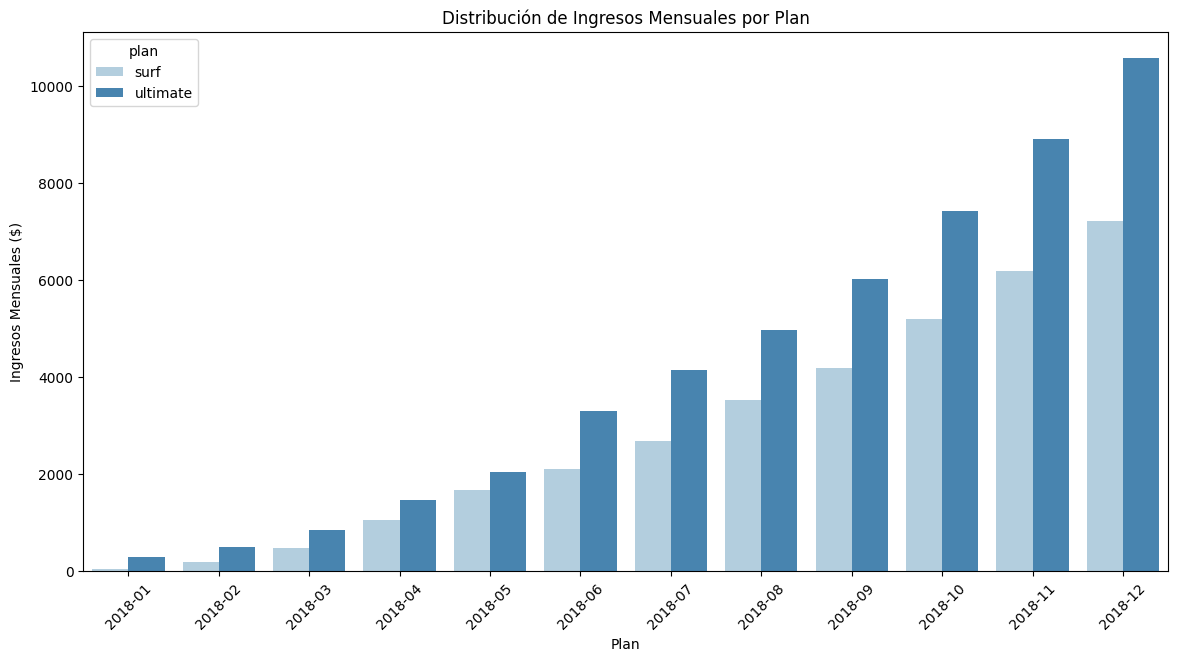

In [43]:
# Compara los pagos mensuales de cada plan

# Agrupar los pagos por plan y calcular el pago promedio por plan 
pay_by_plan_month = user_data_full.groupby(['plan', 'month'])['total_monthly_revenue'].sum().reset_index()

# Graficar los pagos mensuales de cada plan
plt.figure(figsize=(14, 7))
sns.barplot(data=pay_by_plan_month, x='month', y='total_monthly_revenue', hue='plan', palette='Blues')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales ($)')
plt.xticks(rotation=45)
plt.show()

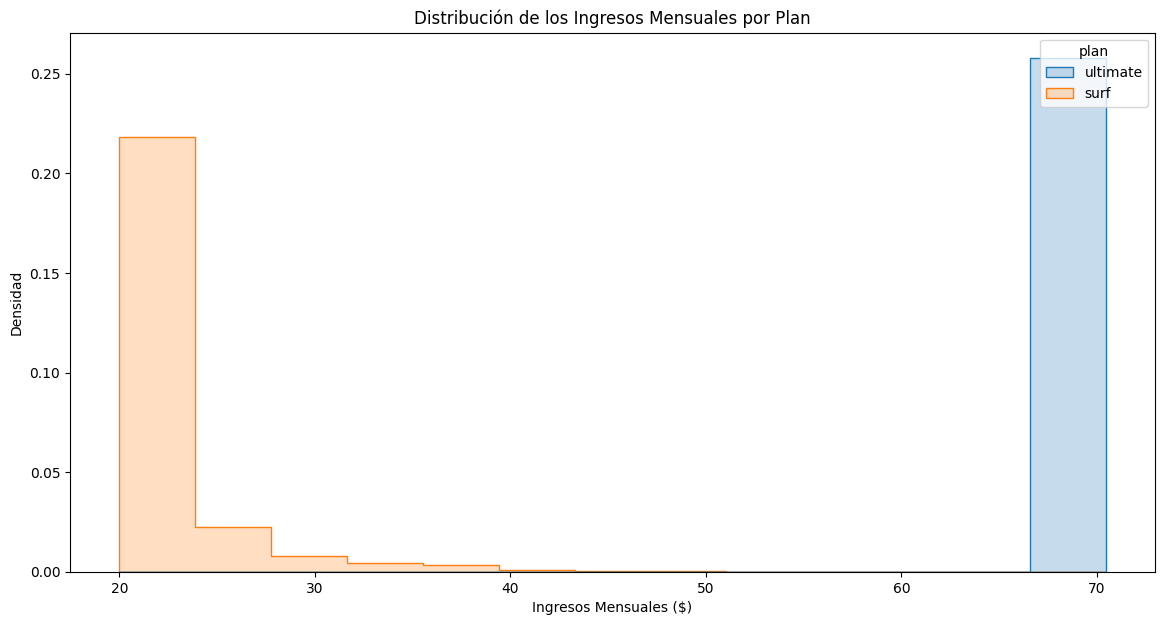

In [44]:
# Histograma de los ingresos mensuales por plan
plt.figure(figsize=(14, 7))
sns.histplot(data=user_data_full, x='total_monthly_revenue', hue='plan', element='step', stat='density', common_norm=False)
plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.xlabel('Ingresos Mensuales ($)')
plt.ylabel('Densidad')
plt.show()

In [45]:
# Agrupar por plan y calcular la varianza de la tarifa por plan
pay_by_plan_month_var = user_data_full.groupby(['plan', 'month'])['total_monthly_revenue'].var().reset_index()

# Filtrar los resultados por plan
pay_by_plan_month_surf_var = pay_by_plan_month_var[pay_by_plan_month_var['plan'] == 'surf']
pay_by_plan_month_ultimate_var = pay_by_plan_month_var[pay_by_plan_month_var['plan'] == 'ultimate']

# Union de la varianza del pago mensual en ambos planes
pd.merge(pay_by_plan_month_surf_var.drop(columns=["plan"]),
         pay_by_plan_month_ultimate_var.drop(columns=["plan"]),
         on="month",
         suffixes=('_surf', '_ultimate'))

,month,total_monthly_revenue_surf,total_monthly_revenue_ultimate
0,2018-01,0.001717,0.000000
1,2018-02,7.700465,0.005823
2,2018-03,3.790403,0.015115
3,2018-04,7.261008,0.010493
4,2018-05,10.481869,0.005122
5,2018-06,9.139484,0.005183
6,2018-07,14.635093,0.007529
7,2018-08,10.363599,0.006566
8,2018-09,8.405410,0.005937
9,2018-10,10.518768,0.006744


Estadísticas por Plan:
        plan    month       mean     median  mode       std
0       surf  2018-01  20.029297  20.029297  20.0  0.041432
1       surf  2018-02  21.086160  20.273438  20.0  2.774971
2       surf  2018-03  20.754595  20.195312  20.0  1.946896
3       surf  2018-04  21.011731  20.156250  20.0  2.694626
4       surf  2018-05  21.590243  20.273438  20.0  3.237572
5       surf  2018-06  21.634102  20.312500  20.0  3.023158
6       surf  2018-07  22.148095  20.439453  20.0  3.825584
7       surf  2018-08  21.731259  20.375977  20.0  3.219254
8       surf  2018-09  21.551653  20.390625  20.0  2.899209
9       surf  2018-10  21.941406  20.419922  20.0  3.243265
10      surf  2018-11  21.838177  20.410156  20.0  3.148013
11      surf  2018-12  22.685388  20.528398  20.0  4.574159
12  ultimate  2018-01  70.000000  70.000000  70.0  0.000000
13  ultimate  2018-02  70.091797  70.082031  70.0  0.076312
14  ultimate  2018-03  70.116211  70.075195  70.0  0.122943
15  ultimate  201

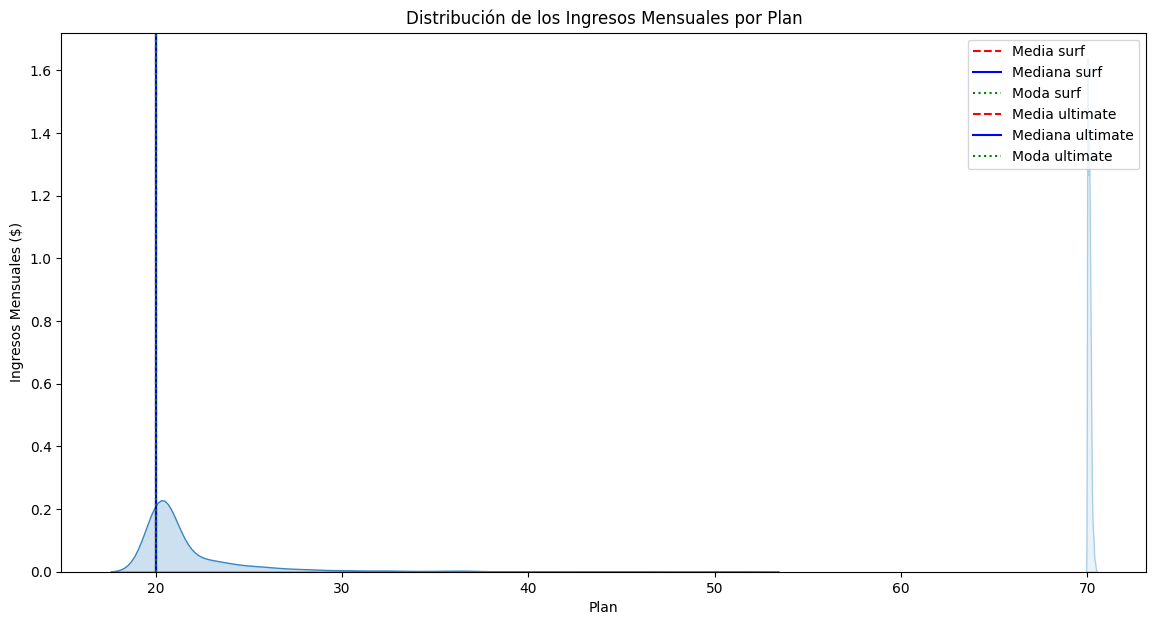

In [46]:
# Calcular estadísticos por plan y mes
pay_by_plan_month = user_data_full.groupby(['plan', 'month'])['total_monthly_revenue'].agg(['mean', 'median', lambda x: st.mode(x)[0][0], 'std']).reset_index()
pay_by_plan_month.columns = ['plan', 'month', 'mean', 'median', 'mode', 'std']

print("Estadísticas por Plan:")
print(pay_by_plan_month)

# Visualización con KDE y líneas de media y mediana
plt.figure(figsize=(14, 7))
sns.kdeplot(data=user_data_full, x='total_monthly_revenue', hue='plan', palette='Blues', fill=True)

# Añadir líneas para cada plan
for plan in pay_by_plan_month['plan'].unique():
    pay_by_plan_month_stats = pay_by_plan_month[pay_by_plan_month['plan'] == plan]
    plt.axvline(pay_by_plan_month['mean'].values[0], color='red', linestyle='--', label=f'Media {plan}')
    plt.axvline(pay_by_plan_month['median'].values[0], color='blue', linestyle='-', label=f'Mediana {plan}')
    plt.axvline(pay_by_plan_month['mode'].values[0], color='green', linestyle=':', label=f'Moda {plan}')

plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales ($)')
plt.legend()
plt.show()

Conclusiones sobre las tarifas de ambos planes:

Los usuarios del plan "ultimate" generan más ingresos en promedio comparados con los usuarios del plan "surf".
Esto se debe tanto a la tarifa base más alta como a un mayor uso adicional de mensajes, minutos y datos.

La varianza de los ingresos es alta en ambos planes, pero es particularmente alta en el plan "ultimate", lo que sugiere que hay una amplia gama de comportamientos de uso entre los usuarios de este plan.

La estructura del plan "ultimate", con mayores límites y menores costos adicionales, puede estar incentivando a los usuarios a consumir más servicios, resultando en ingresos más altos y variados. Esta información puede ser útil para diseñar nuevas estrategias de precios y paquetes de servicios que maximicen los ingresos y satisfagan las necesidades de los usuarios.

Los usuarios del plan "ultimate" generan más ingresos en promedio comparados con los usuarios del plan "surf". Esto se debe a la tarifa fija mensual más alta del plan "ultimate".

La varianza de los ingresos es más alta en el plan "surf", lo que indica que los ingresos de este plan son más variables y dependen más del uso adicional de servicios.

Los usuarios del plan "ultimate" probablemente tienen un uso más consistente de los servicios incluidos en su plan, lo que resulta en ingresos más predecibles. En contraste, los usuarios del plan "surf" tienen un comportamiento de uso más variable, lo que puede ser una oportunidad para ajustar las tarifas o los límites del plan para maximizar los ingresos.

Esta información puede ser útil para diseñar estrategias de precios y paquetes de servicios que maximicen los ingresos y satisfagan las necesidades de los usuarios.

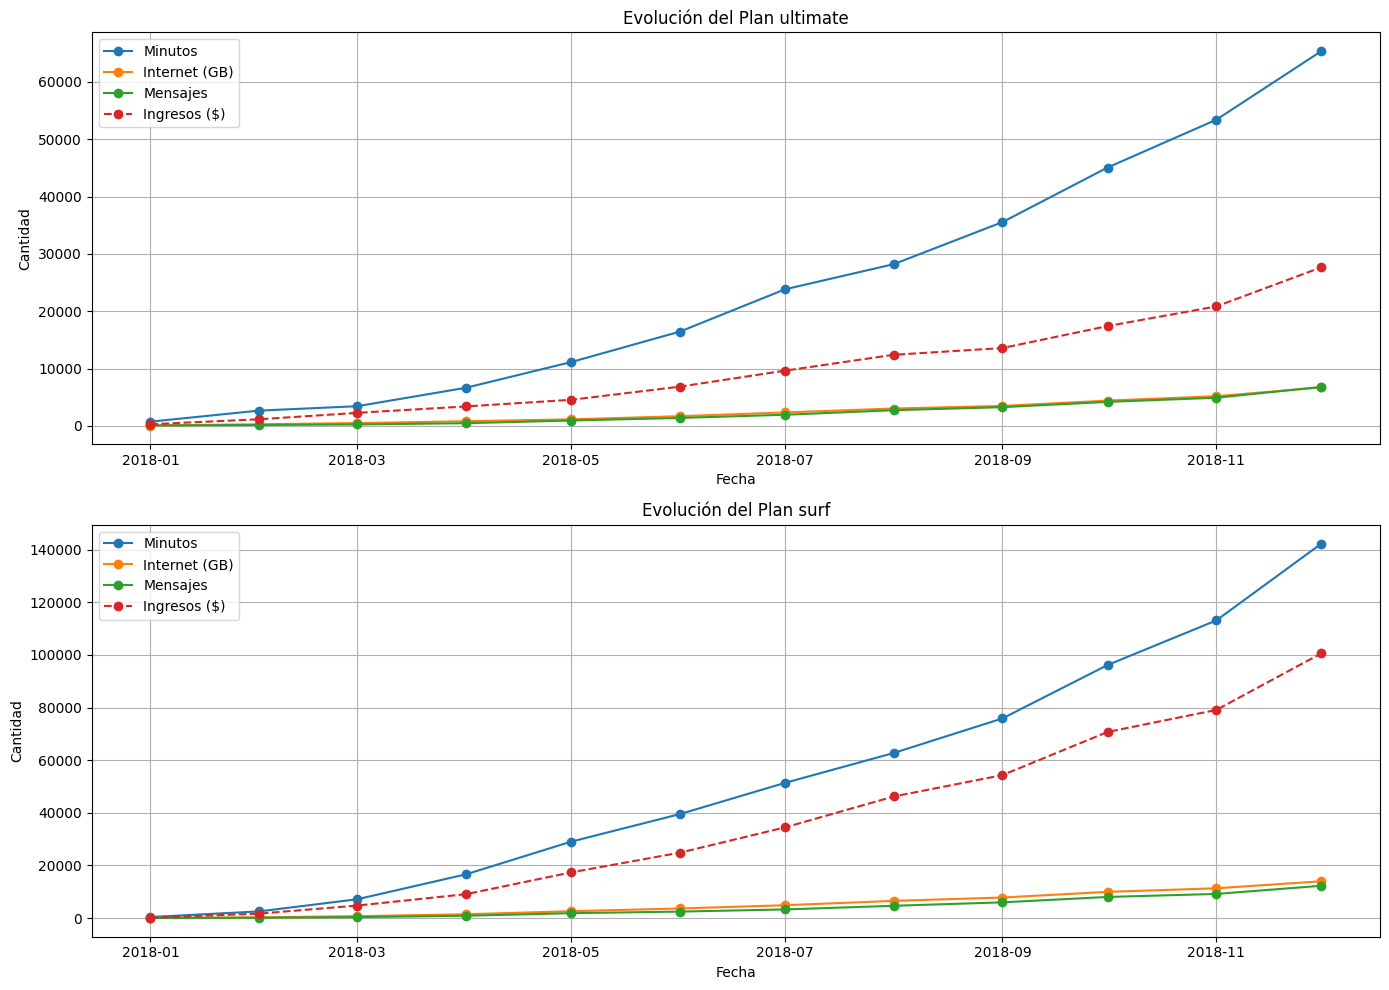

In [47]:
# Calculamos los ingresos según las tarifas del plan
def calculate_revenue(row):
    extra_minutes = max(0, row['minutes_used'] - row['minutes_included'])
    extra_messages = max(0, row['messages_count'] - row['messages_included'])
    extra_gb = max(0, row['gb_used'] - row['gb_per_month_included'])
    revenue = (row['usd_monthly_pay'] + 
               extra_minutes * row['usd_per_minute'] + 
               extra_messages * row['usd_per_message'] + 
               extra_gb * row['usd_per_gb'])
    return revenue

user_data_full['Ingresos'] = user_data_full.apply(calculate_revenue, axis=1)

# Convertimos la columna 'month' a tipo datetime
user_data_full['month'] = user_data_full['month'].astype(str).apply(lambda x: x + '-01')
user_data_full['month'] = pd.to_datetime(user_data_full['month'])

# Agrupamos los datos por plan y mes
grouped_data = user_data_full.groupby(['plan', 'month']).sum().reset_index()

# Creamos los gráficos de líneas
plt.figure(figsize=(14, 10))

plans = user_data_full['plan'].unique()
for i, plan in enumerate(plans):
    plt.subplot(len(plans), 1, i+1)
    plan_data = grouped_data[grouped_data['plan'] == plan]
    plt.plot(plan_data['month'], plan_data['minutes_used'], marker='o', label='Minutos')
    plt.plot(plan_data['month'], plan_data['gb_used'], marker='o', label='Internet (GB)')
    plt.plot(plan_data['month'], plan_data['messages_count'], marker='o', label='Mensajes')
    plt.plot(plan_data['month'], plan_data['Ingresos'], marker='o', linestyle='--', label='Ingresos ($)')
    plt.title(f'Evolución del Plan {plan}')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

En la imagen muestra la evolución en el tiempo de los minutos de llamadas, el uso de internet, los mensajes y los ingresos para los planes: "ultimate" y "surf". 

Conclusión sobre los gráficos:

Minutos de llamadas: Para ambos planes, hay un aumento constante en el número de minutos usados a lo largo del tiempo. El plan "ultimate" muestra un crecimiento más rápido en los minutos de llamadas comparado con el plan "surf".

Uso de Internet (GB): En ambos planes, el uso de internet (GB) también muestra un incremento gradual. Sin embargo, el plan "ultimate" tiene un crecimiento más moderado en comparación con los minutos de llamadas, mientras que en el plan "surf" el uso de internet crece de forma constante.

Mensajes: El número de mensajes enviados muestra una tendencia más estable y menos pronunciada en comparación con los minutos. El plan "ultimate" tiene una ligera subida en el número de mensajes, pero no es tan significativo como los otros parámetros. El plan "surf" muestra una tendencia similar.

Ingresos: Los ingresos para ambos planes aumentan a lo largo del tiempo. En el plan "ultimate", los ingresos crecen de manera constante y proporcionalmente a los minutos de llamadas. En el plan "surf", los ingresos también aumentan, pero el crecimiento parece estar más alineado con el uso de internet y los minutos de llamadas.

Conclusiones de ambos planes:

Plan Ultimate: Este plan parece estar atrayendo a usuarios que hacen un uso intensivo de los minutos de llamadas, lo cual podría estar impulsando los ingresos significativamente, aunque el uso de internet crece, no es tan rápido como el aumento en los minutos de llamadas.

Plan Surf: En comparación, el plan "surf" parece estar siendo utilizado por usuarios que incrementan tanto el uso de internet como los minutos de llamadas, pero a un ritmo más equilibrado.

Los ingresos también muestran un crecimiento constante, impulsado tanto por el uso de internet como por los minutos de llamadas.

En resumen, ambos planes están mostrando un aumento en el uso y en los ingresos a lo largo del tiempo, pero el plan "ultimate" tiene un crecimiento más acentuado en los minutos de llamadas, mientras que el plan "surf" presenta un uso más equilibrado entre internet y llamadas.

## Prueba las hipótesis estadísticas

Vamos realizamos una prueba de hipótesis para comparar los ingresos mensuales promedio generados por dos planes de suscripción diferentes: "ultimate" y "surf". Utilizaremos la prueba t de Student para muestras independientes para determinar si existe una diferencia significativa entre los ingresos promedio de estos dos planes.

Primero vaamos a filtrar los datos para obtener los ingresos mensuales totales (total_monthly_revenue) de los usuarios que están suscritos al plan "ultimate".

Luego, vamos a filtrar los datos para obtener los ingresos mensuales totales de los usuarios que están suscritos al plan "surf".

Vamos a utilizar la función ttest_ind de la biblioteca scipy.stats para realizar la prueba t de Student. Esta prueba compara las medias de dos muestras independientes para determinar si existe una diferencia significativa entre ellas.

En este caso, usaremos el parámetro equal_var=False, que aplica la prueba de Welch, una versión de la prueba t que no asume que las varianzas de las dos muestras son iguales.

Vamos a definir un nivel de significancia (alpha) del 0.05. Este nivel es un umbral comúnmente utilizado en pruebas de hipótesis para determinar si los resultados son estadísticamente significativos.

Con este análisis esperamos calcular el estadístico t y el valor p, los cuales nos ayudaran a tomar la decisión sobre la hipótesis nula, si el valor p es menor que el nivel de significancia (alpha), rechazamos la hipótesis nula (H₀), lo que indica que los ingresos mensuales promedio son significativamente diferentes entre los dos planes, pero si el valor p es mayor o igual al nivel de significancia, ceptamos la hipótesis alternativa (H₁), indicando que no hay suficiente evidencia para afirmar que los ingresos mensuales promedio son diferentes entre los dos planes.

In [48]:
# Prueba las hipótesis

# Filtrar los datos por plan
ultimate_revenue = user_data_full[user_data_full['plan'] == 'ultimate']['total_monthly_revenue']
surf_revenue = user_data_full[user_data_full['plan'] == 'surf']['total_monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes.")
else:
    print("Rechazamos la hipótesis alternativa (H₁). No hay suficiente evidencia para afirmar que los ingresos promedio son diferentes.")

Estadístico t: 542.5919584823391
Valor p: 0.0
Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes.


En este análisis, hemos comparado los ingresos mensuales promedio generados por los planes de suscripción "ultimate" y "surf" utilizando la prueba t de Student para muestras independientes.

El resultado de la prueba nos proporciona un estadístico t de 542.59 y un valor p de 0.0. Dado que el valor p es significativamente menor que el nivel de significancia establecido (alpha = 0.05), rechazamos la hipótesis nula. Esto indica que existe una diferencia estadísticamente significativa entre los ingresos mensuales promedio de los planes "ultimate" y "surf".

La conclusión de que los ingresos mensuales promedio son diferentes entre los dos planes sugiere que los planes de suscripción tienen un impacto notable en los ingresos, esta información es crucial para la estrategia de precios y la optimización de los planes de suscripción, permitiendo a la empresa ajustar sus ofertas para maximizar los ingresos y satisfacer mejor las necesidades de sus clientes.

Se considerar una revisión de los precios de los planes para equilibrar la accesibilidad y la rentabilidad. Implementar estrategias de marketing dirigidas específicamente a promover el plan que genera más ingresos, o ajustar las características del plan menos rentable para aumentar su atractivo.

Se debe continuar monitoreando los ingresos por plan para detectar cualquier cambio en las tendencias y ajustar las estrategias en consecuencia.

Este análisis proporciona una base sólida para la toma de decisiones informadas sobre la gestión y mejora de los planes de suscripción, contribuyendo a la optimización de los ingresos de la empresa.

Vamos a realizar una prueba de hipótesis para comparar los ingresos mensuales promedio entre dos grupos de usuarios, aquellos que residen en la región "NY-NJ-PA MSA" y aquellos que residen en otras regiones. 

La prueba estadística utilizada es la prueba t de Student para muestras independientes.

Estos son los pasos seguidos en el análisis:

Filtrado de Datos por Región: Primero vamos a filtrar los datos para obtener los ingresos mensuales totales (total_monthly_revenue) de los usuarios que residen en la región "NY-NJ-PA MSA".

Luego vamos a filtrar los datos para obtener los ingresos mensuales totales de los usuarios que residen en otras regiones.


vamos a utilizar la función ttest_ind de la biblioteca scipy.stats para realizar la prueba t de Student. Esta prueba comparara las medias de dos muestras independientes para determinar si existe una diferencia significativa entre ellas.

En este caso, usaremos el parámetro equal_var=False, que aplica la prueba de Welch, una versión de la prueba t que no asume que las varianzas de las dos muestras son iguales.

Vamos a definir un nivel de significancia (alpha) del 0.05. Este nivel es un umbral comúnmente utilizado en pruebas de hipótesis para determinar si los resultados son estadísticamente significativos.


Esperamos Calcular el estadístico t y el valor p, los cuales nos ayudaran a tomar la decisión sobre la hipótesis nula (H₀), si el valor p es menor que el nivel de significancia (alpha), rechazamos la hipótesis nula, lo que indica que los ingresos mensuales promedio seran significativamente diferentes entre las dos regiones.

Si el valor p es mayor o igual al nivel de significancia, aceptamos la hipótesis alternativa (H₁), indicando que no hay suficiente evidencia para afirmar que los ingresos mensuales promedio sean diferentes entre las dos regiones.

In [49]:
# Prueba las hipótesis

# Filtrar los datos por región
ny_nj_revenue = user_data_full[user_data_full['state'] == 'NY-NJ-PA MSA']['total_monthly_revenue']
other_regions_revenue = user_data_full[user_data_full['state'] != 'NY-NJ-PA MSA']['total_monthly_revenue']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

# Nivel de significancia
alpha = 0.05

# Resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes.")
else:
    print("rechazamos la hipótesis alternativa (H₁). No hay suficiente evidencia para afirmar que los ingresos promedio son diferentes.")

Estadístico t: -7.7880741308822365
Valor p: 2.8236018974078433e-14
Rechazamos la hipótesis nula (H₀). Los ingresos promedio son diferentes.


La conclusión basada en los valores del estadístico t y el valor p es la siguiente:

Estadístico t: -7.788 un estadístico t tan negativo indica una diferencia considerable entre las medias de los grupos comparados, sugiriendo que la diferencia observada no es debida al azar.

Valor p: 2.8236018974078433e-14 este valor p es extremadamente pequeño (prácticamente cero), lo que indica que la probabilidad de observar una diferencia tan extrema, o más extrema, bajo la hipótesis nula (H₀) es casi nula.
Rechazo de la hipótesis nula (H₀):

Dado que el valor p es significativamente menor que el nivel de significancia comúnmente utilizado (0.05), se rechaza la hipótesis nula. La hipótesis nula generalmente establece que no hay diferencia en los ingresos promedio entre los grupos comparados.

En conclusión rechazamos la hipótesis nula y concluimos que existen diferencias significativas en los ingresos promedio entre los grupos comparados. Esto significa que la evidencia estadística es muy fuerte para afirmar que los ingresos promedio no son iguales.

## Conclusión general

En este análisis hemos abordado diversos aspectos del comportamiento de los usuarios de diferentes planes de llamadas, así como sus ingresos asociados. A continuación, se enumeran las conclusiones más importantes:

Se llevó a cabo un proceso de limpieza y preparación de datos que incluyó la conversión de fechas y la categorización de datos, se crearon columnas adicionales para enriquecer el análisis, como la duración de la suscripción y la categoría de edad de los usuarios.

El análisis mostró que no hay diferencias significativas en la duración promedio de las llamadas entre los usuarios de los planes "surf" y "ultimate", los histogramas y diagramas de caja confirmaron que ambos planes tienen distribuciones similares en términos del número de minutos usados mensualmente.

Los usuarios del plan 'Ultimate' envían más mensajes en promedio que los usuarios del plan 'Surf'. La varianza en el número de mensajes enviados es ligeramente mayor en el plan 'Ultimate', lo que indica una mayor dispersión en el comportamiento de los usuarios de este plan.

Los usuarios del plan "ultimate" tienden a usar más datos en comparación con los del plan "surf". La distribución del uso de datos mostró una mayor dispersión en el plan "ultimate", indicando que algunos usuarios podrían estar aprovechando al máximo el límite más alto de datos incluidos en este plan.

Los ingresos promedio mensuales son significativamente diferentes entre los dos planes. El plan "ultimate" genera ingresos promedio más altos, lo cual es consistente con su tarifa mensual más alta.

Se realizó una prueba estadística para comparar los ingresos promedio de los usuarios del área NY-NJ con los de otras regiones también mostró unas diferencias significativas, con ingresos promedio más altos en el área NY-NJ.

Se llevaron a cabo pruebas de hipótesis para comparar los ingresos promedio entre los planes y entre las regiones, ambas pruebas resultaron en el rechazo de la hipótesis nula, indicando diferencias significativas en los ingresos.

Se utilizó la prueba t de Student para comparar las medias de los ingresos debido a su adecuación para comparar dos grupos independientes. Se estableció un nivel de significancia (alfa) de 0.05 para determinar la significancia estadística.

La creación de columnas adicionales, como la duración de la suscripción y la categorización de edad, fue crucial para proporcionar un contexto más rico y permitir análisis más detallados.

La segmentación de los usuarios por región permitió identificar diferencias en el comportamiento y los ingresos, lo cual puede ser útil para estrategias de marketing y pricing.

Dado que los usuarios del plan "ultimate" generan mayores ingresos y tienden a usar más datos, podría ser beneficioso enfocar campañas de marketing en destacar los beneficios de este plan. Las diferencias regionales en los ingresos sugieren que las estrategias de pricing y promociones pueden necesitar ser ajustadas según la región.

Desarrollo de Productos: La similitud en el uso de minutos entre los planes indica que los usuarios valoran otros aspectos además de las llamadas, como los datos y los mensajes. Es recomendable seguir mejorando y diferenciando estos aspectos en los planes y analizar más a fondo las características de los usuarios que permanecen más tiempo suscritos puede ayudar a desarrollar estrategias de retención más efectivas.

Estas conclusiones proporcionan una visión integral del comportamiento de los usuarios y los ingresos generados por los diferentes planes, así como valiosas recomendaciones para futuras estrategias de negocio.